<div class="alert alert-block alert-info">
<center>Métodos Numericos</center>
<center>LISTA 4b</center>
<center>ALUNO: João Pedro de Sousa Corrêa</center>
</div>

<div class="alert alert-block alert-info">
<h4>1. Implemente os algoritmos da iteração de ponto fixo, Newton-Raphson e secante usando somente a biblioteca Numpy</h4>
</div>

In [1]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

In [2]:
def ponto_fixo(g,x0, tol=1e-10):#ponto fixo
    erro,x1 = 1,0
    interacoes = 0
    convergencia = True
    parada = True 
    while parada:
        
        x1 = g(x0)
  
        erro = np.abs((x1 - x0))/np.abs(x1)
        x0 = np.abs(x1)
        
        interacoes +=1
        if (erro<=tol):
            parada = False
        if (interacoes>=200):
            parada = False
            convergencia = False
        
        
    return {"Convergencia":convergencia,
                        "Interações":interacoes,
                        "Root":x1
                }

f = lambda x: np.exp(-x)

In [3]:
ponto_fixo(f,0,1e-1)

{'Convergencia': True, 'Interações': 7, 'Root': 0.5796123355033789}

In [4]:
def newton(f, df, x0, tol = 1e-10):#newton
    if np.abs(f(x0)) < tol:
        return x0
    else:
        return newton(f, df, x0 - f(x0)/df(x0))

In [5]:
f1 = lambda x: np.exp(-x) - x
f2 = lambda x: -np.exp(-x) - 1
newton(f1,f2,0)

0.5671432904097811

In [6]:
def secante(f,x0,x1,e = 1e-10,N = 10):
    cont = 1
    parada = True
    while parada:
        if f(x0) == f(x1):
            print('Erro. Divisão por zero')
            break

        x2 = x0 - (x1-x0)*f(x0)/( f(x1) - f(x0) ) 
       
        x0 = x1
        x1 = x2
        cont +=  1

        if cont > N:
            print('Não converge')
            break

        parada = np.abs(f(x2)) > e
        
    return x2

f = lambda x: np.cos(x) - x

In [7]:
secante(f,-1,0)

0.739085133215161

<div class="alert alert-block alert-info">
<h4>2. Use a iteração de ponto fixo simples para localizar a raiz de $f (x) = 2 \sin(√x)− x$, tendo x0 = 0, 5
e adotando como critério de parada o erro $ e_a ≤ 0,001%$.</h4>
</div>

In [8]:
def fi(x):
    return 2*np.sin(x**(1/2))-x

def gfi(x):
    return 2*np.sin(x**(1/2))#simplificado

ponto_fixo(gfi,0.5,1e-3)

{'Convergencia': True, 'Interações': 6, 'Root': 1.9723441782726674}

<div class="alert alert-block alert-info">
<h4>3. Determine a maior raiz real de $f (x) = 2x^3 − 11.7x^2 + 17.7x − 5$
    <p> (a) Graficamente;</p>
    <p> (b) Pelo método da iteração de ponto fixo (três iterações, x0 = 3)( certifique-se de desenvolver uma solução que convirja para a raiz);</p>
    <p>(c) Pelo método de Newton-Raphson (três iterações, x0 = 3); </p>
    <p>(d) Pelo método da secante (três iterações, x−1 = 3, x0 = 4). </p></h4>
</div>

In [9]:
def f3(x):
    return (2*(x**3))-(11.7*(x**2))+(17.7*x)-5

def gf3(x):
    return ((2*(x**3))-(11.7*(x**2))-5)/-17.7 #simplificado

def f3i(x):
    return 6*(x**2)-23.4*x+17.7 #derivada

<h4>(a) 

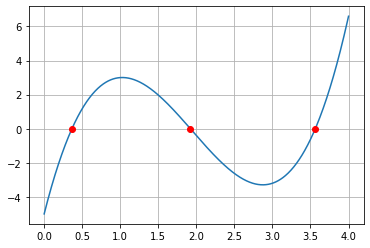

In [10]:
x = np.linspace(0,4,1000)
plt.plot(x,f3(x))
plt.plot([0.36,1.92,3.56],[0,0,0],'ro')
plt.grid()

<h4>(b)

In [11]:
def ponto_fixo2(g,x0,interacao = 100):#ponto fixo2
    cont,x1 = 0,0
    while interacao!=cont:
        x1 = g(x0)
        x0 =  np.abs(x1)
        cont+=1
    return x1


ponto_fixo2(gf3,3,3)

3.442543246990202

<h4>(c) 

In [12]:
def newton2(f, df, x0, tol = 100,cont = 0):#newton
   
    if cont == tol:
        return x0
    else:
        cont+=1
        
        return newton2(f, df, x0 - f(x0)/df(x0),tol,cont)
newton2(f3,f3i,3,3)

3.7929344806432264

<h4>(d)

In [13]:
secante(f3,3,4,1e-10,3)

Não converge


3.586275384711736

<div class="alert alert-block alert-info">
<h4>4. Compare os métodos da bisseção, falsa posição, do ponto fixo, de Newton-Raphson e da secante, localizando a raiz das seguintes equações:
<p></p>    
<p> (a) $ f1(x) = 2x^4 + 4x^3 + 3x^2 − 10x − 15,$ com $x^∗ ∈ [0, 3]$</p>
<p> (b) $ f2 (x) = (x + 3)(x + 1)(x − 2)^3,$ com $x^∗ ∈ [0, 5]$</p>
<p> (c) $ f3 (x) = 5x^3 + x^2 − e^(1−2x) + cos(x) + 20,$ com $x^∗ ∈ [-5, 5]$</p>
<p> (d) $ f4(x) = sin(x)^x + 4,$ com $x^∗ ∈ [1, 5]$</p>
<p> (e) $  f5(x) = (x − 3)^5 ln(x),$ com $x^∗ ∈ [2, 5]$</p>
<p> (f) $  f6 (x) = x^10 − 1,$ com $x^∗ ∈ [0.8, 1.2]$</p>
   
</h4>
</div>

In [14]:
def interpolacao(f, a, b, tol=1e-10):#Falsa posição
    erro, x_ant = 1, a
    interacoes = 0
    convergencia = True
 
    while(erro > tol and interacoes < 200):
        inf = np.sign(f(a))
        sup = np.sign(f(b))
        if inf*sup != -1: 
            convergencia = False
            
            return inf*sup
        else:
            x = a-((f(a)*(b-a))/(f(b)-f(a)))
            if f(x) == 0:
                
               
                return {"Convergencia":convergencia,
                        "Interações":interacoes,
                        "Root":x
                }
            
            elif inf*np.sign(f(x)) == -1: b = x
            else: a = x
                
        erro = np.abs((x - x_ant)/x)
        x_ant = x
        interacoes+=1
    if(interacoes == 200):
        convergencia = False
        
    return {"Convergencia":convergencia,
                        "Interações":interacoes,
                        "Root":x
                }

<h4>a) 

In [15]:
def f1(x):
    return (2*(x**4))+(4*(x**3))+(3*(x**2))-(10*x)-15

def f1i(x):
    return (8*(x**3))+(12*(x**2))+(6*x)-10 #derivada

def gf1(x):
    return ((2*(x**4))+(4*(x**3))+(3*(x**2))-15)/10 #simplificada

def g2f1(x):
    return ((x**2)*(2*(x**2)+4*(x)+3)-15)/10 #simplificada2


In [16]:
ABiss = opt.root_scalar(f1,method = "bisect", bracket = [0,3], xtol = 1e-10)#Bisseção
ABiss

      converged: True
           flag: 'converged'
 function_calls: 37
     iterations: 35
           root: 1.4928787086100783

In [17]:
AFalsaP = interpolacao(f1,0,3, 1e-10)#Falsa posição
AFalsaP

{'Convergencia': True, 'Interações': 64, 'Root': 1.492878708406769}

In [18]:
APontoF = ponto_fixo(gf1,3,1e-10)#ponto fixo
APontoF

<ipython-input-15-9a4956a23660>:8: RuntimeWarning: overflow encountered in double_scalars
  return ((2*(x**4))+(4*(x**3))+(3*(x**2))-15)/10 #simplificada
<ipython-input-2-abe29f83e94e>:10: RuntimeWarning: invalid value encountered in double_scalars
  erro = np.abs((x1 - x0))/np.abs(x1)


{'Convergencia': False, 'Interações': 200, 'Root': inf}

In [19]:
ANewton = opt.root_scalar(f1, fprime=f1i, x0=3, method='newton')#newton
ANewton

      converged: True
           flag: 'converged'
 function_calls: 14
     iterations: 7
           root: 1.4928787086636037

In [20]:
ASecant = opt.root_scalar(f1, method='secant', x0=0, x1=3)#secante
ASecant

      converged: True
           flag: 'converged'
 function_calls: 12
     iterations: 11
           root: -1.3003841326439196

Comparação de raizes:

In [21]:
raizes = [ABiss.root,AFalsaP['Root'],APontoF['Root'],ANewton.root,ASecant.root]
metodos = ["Bisseção","Falsa Posição","Ponto fixo","Newton","Secante"]
print("----------Raizes---------- ")
for i in range(len(raizes)):
    print(metodos[i],":",raizes[i])

----------Raizes---------- 
Bisseção : 1.4928787086100783
Falsa Posição : 1.492878708406769
Ponto fixo : inf
Newton : 1.4928787086636037
Secante : -1.3003841326439196


Comparação de interações:

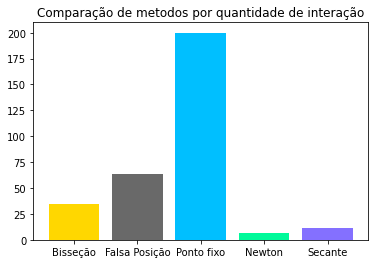

In [22]:
index = np.arange(5)
plt.title("Comparação de metodos por quantidade de interação")
plt.bar([1,2,3,4,5],[ABiss.iterations,AFalsaP['Interações'],APontoF['Interações'],ANewton.iterations,ASecant.iterations],color = ['#FFD700','#696969','#00BFFF','#00FA9A','#8470FF'])
plt.xticks(index+1, ("Bisseção","Falsa Posição","Ponto fixo","Newton","Secante"))
plt.show()

Comparação de convergencia:

In [23]:
convergencia = [ABiss.converged,AFalsaP['Convergencia'],APontoF['Convergencia'],ANewton.converged,ASecant.converged]
metodos = ["Bisseção","Falsa Posição","Ponto fixo","Newton","Secante"]
print("----------Convergencia---------- ")
for i in range(len(raizes)):
    print(metodos[i],":",convergencia[i])

----------Convergencia---------- 
Bisseção : True
Falsa Posição : True
Ponto fixo : False
Newton : True
Secante : True


Tempo de calculo:

In [24]:
t1 = %timeit -o ABiss
t2 = %timeit -o AFalsaP
t3 = %timeit -o APontoF
t4 = %timeit -o ANewton
t5 = %timeit -o ASecant

36.3 ns ± 1.84 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
37.1 ns ± 2.7 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
35.8 ns ± 1.22 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
32.7 ns ± 1.29 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
36.3 ns ± 1.38 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [25]:
def calcualePorcent(tempo):
    somaTempo = t1.best+t2.best+t3.best+t4.best+t5.best
    media = somaTempo/5
    listaPorcentagens = []
    for x in tempo:
        listaPorcentagens.append(x*100/media-100)
    return listaPorcentagens

In [26]:
porcent = calcualePorcent([t1.best,t2.best,t3.best,t4.best,t5.best])
print("----------Porcentagem sobre a media do tempo---------- ")
for i in range(len(porcent)):
    print(metodos[i],":",porcent[i],"%")

----------Porcentagem sobre a media do tempo---------- 
Bisseção : 1.2676417925381287 %
Falsa Posição : 1.283039457334894 %
Ponto fixo : 1.4516692021686595 %
Newton : -8.27864233696657 %
Secante : 4.276291884924859 %


<h4>b)

In [27]:
def f2(x):
    return (x+3)*(x+1)*(x-2)**3

def f2i(x):
    return (2*x)*(x-2)**3+4*(x-2)**3+3*(x**4)-27*(x**2)+12*x+36 #derivada

def gf2(x):
    return (-3*(x**3)-6*(x**2)+18)/15 #simplificada


In [28]:
BBiss = opt.root_scalar(f2,method = "bisect", bracket = [0,5], xtol = 1e-10)#Bisseção
BBiss

      converged: True
           flag: 'converged'
 function_calls: 38
     iterations: 36
           root: 2.0000000000436557

In [29]:
BFalsaP = interpolacao(f2,0,5, 1e-10)#Falsa posição
BFalsaP

{'Convergencia': False, 'Interações': 200, 'Root': 1.714409136227646}

In [30]:
BPontoF = ponto_fixo(gf2,5,1e-10)#ponto fixo
BPontoF

<ipython-input-27-30dc2d972614>:8: RuntimeWarning: overflow encountered in double_scalars
  return (-3*(x**3)-6*(x**2)+18)/15 #simplificada
<ipython-input-2-abe29f83e94e>:10: RuntimeWarning: invalid value encountered in double_scalars
  erro = np.abs((x1 - x0))/np.abs(x1)


{'Convergencia': False, 'Interações': 200, 'Root': -inf}

In [31]:
BNewton = opt.root_scalar(f2, fprime=f2i, x0=5, method='newton')#newton
BNewton

      converged: True
           flag: 'converged'
 function_calls: 94
     iterations: 47
           root: 2.0000000289562236

In [32]:
BSecant = opt.root_scalar(f2, method='secant', x0=0, x1=5)#secante
BSecant

      converged: False
           flag: 'convergence error'
 function_calls: 52
     iterations: 50
           root: 2.0000006433369486

Comparação de raizes:

In [33]:
raizes = [BBiss.root,BFalsaP['Root'],BPontoF['Root'],BNewton.root,BSecant.root]
metodos = ["Bisseção","Falsa Posição","Ponto fixo","Newton","Secante"]
print("----------Raizes---------- ")
for i in range(len(raizes)):
    print(metodos[i],":",raizes[i])

----------Raizes---------- 
Bisseção : 2.0000000000436557
Falsa Posição : 1.714409136227646
Ponto fixo : -inf
Newton : 2.0000000289562236
Secante : 2.0000006433369486


Comparação de interações:

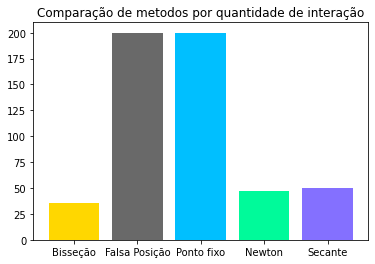

In [34]:
index = np.arange(5)
plt.title("Comparação de metodos por quantidade de interação")
plt.bar([1,2,3,4,5],[BBiss.iterations,BFalsaP['Interações'],BPontoF['Interações'],BNewton.iterations,BSecant.iterations],color = ['#FFD700','#696969','#00BFFF','#00FA9A','#8470FF'])
plt.xticks(index+1, ("Bisseção","Falsa Posição","Ponto fixo","Newton","Secante"))
plt.show()

Comparação de convergencia:

In [35]:
convergencia = [BBiss.converged,BFalsaP['Convergencia'],BPontoF['Convergencia'],BNewton.converged,BSecant.converged]
metodos = ["Bisseção","Falsa Posição","Ponto fixo","Newton","Secante"]
print("----------Convergencia---------- ")
for i in range(len(raizes)):
    print(metodos[i],":",convergencia[i])

----------Convergencia---------- 
Bisseção : True
Falsa Posição : False
Ponto fixo : False
Newton : True
Secante : False


Tempo de calculo:

In [36]:
t1B = %timeit -o BBiss
t2B = %timeit -o BFalsaP
t3B = %timeit -o BPontoF
t4B = %timeit -o BNewton
t5B = %timeit -o BSecant

45.1 ns ± 1.18 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
37.5 ns ± 2.02 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
39.7 ns ± 1.64 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
37 ns ± 1.25 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
37.2 ns ± 1.75 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [37]:
def calcualePorcent(tempo):
    somaTempo = t1B.best+t2B.best+t3B.best+t4B.best+t5B.best
    media = somaTempo/5
    listaPorcentagens = []
    for x in tempo:
        listaPorcentagens.append(x*100/media-100)
    return listaPorcentagens

In [38]:
porcent = calcualePorcent([t1B.best,t2B.best,t3B.best,t4B.best,t5B.best])
print("----------Porcentagem sobre a media do tempo---------- ")
for i in range(len(porcent)):
    print(metodos[i],":",porcent[i],"%")

----------Porcentagem sobre a media do tempo---------- 
Bisseção : 15.932165034909843 %
Falsa Posição : -5.211205548197384 %
Ponto fixo : 0.4135856289977653 %
Newton : -5.322835064926721 %
Secante : -5.811710050783546 %


<h4>c) 

In [39]:
def f3(x):
    return 5 * x ** 3 + x ** 2 - np.exp(1 - 2 * x) + np.cos(x) + 20

def f3i(x):
    return 15 * x ** 2 + 2 * x + 2 * np.exp(-2 * x + 1) - np.sin(x)#derivada

def gf3i(x):
    return 5*x**3 + x**2 - np.e**(1-2*x) + np.cos(x) + 20 + x #simplificada

In [40]:
CBiss = opt.root_scalar(f3,method = "bisect", bracket = [-5,5], xtol = 1e-10)#Bisseção
CBiss

      converged: True
           flag: 'converged'
 function_calls: 39
     iterations: 37
           root: -0.9295604598446516

In [41]:
CFalsaP = interpolacao(f3,-5,5, 1e-10)#Falsa posição
CFalsaP

{'Convergencia': False, 'Interações': 200, 'Root': 1.5687692610780033}

In [42]:
CPontoF = ponto_fixo(gf3,5,1e-10)#ponto fixo
CPontoF

{'Convergencia': True, 'Interações': 29, 'Root': 3.563160824729177}

In [43]:
CNewton = opt.root_scalar(f3, fprime=f3i, x0=5, method='newton')#newton
CNewton

      converged: True
           flag: 'converged'
 function_calls: 22
     iterations: 11
           root: -0.9295604598378412

In [44]:
CSecant = opt.root_scalar(f3, method='secant', x0=-5, x1=5)#secante
CSecant

      converged: True
           flag: 'converged'
 function_calls: 24
     iterations: 23
           root: -0.9295604598378417

Comparação de raizes:

In [45]:
raizes = [CBiss.root,CFalsaP['Root'],CPontoF['Root'],CNewton.root,CSecant.root]
metodos = ["Bisseção","Falsa Posição","Ponto fixo","Newton","Secante"]
print("----------Raizes---------- ")
for i in range(len(raizes)):
    print(metodos[i],":",raizes[i])

----------Raizes---------- 
Bisseção : -0.9295604598446516
Falsa Posição : 1.5687692610780033
Ponto fixo : 3.563160824729177
Newton : -0.9295604598378412
Secante : -0.9295604598378417


Comparação de interações:

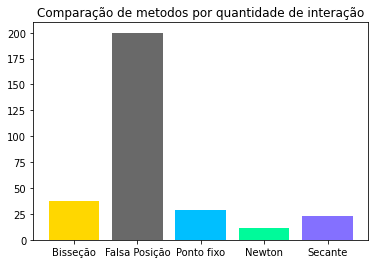

In [46]:
index = np.arange(5)
plt.title("Comparação de metodos por quantidade de interação")
plt.bar([1,2,3,4,5],[CBiss.iterations,CFalsaP['Interações'],CPontoF['Interações'],CNewton.iterations,CSecant.iterations],color = ['#FFD700','#696969','#00BFFF','#00FA9A','#8470FF'])
plt.xticks(index+1, ("Bisseção","Falsa Posição","Ponto fixo","Newton","Secante"))
plt.show()

Comparação de convergencia:

In [47]:
convergencia = [CBiss.converged,CFalsaP['Convergencia'],CPontoF['Convergencia'],CNewton.converged,CSecant.converged]
metodos = ["Bisseção","Falsa Posição","Ponto fixo","Newton","Secante"]
print("----------Convergencia---------- ")
for i in range(len(raizes)):
    print(metodos[i],":",convergencia[i])

----------Convergencia---------- 
Bisseção : True
Falsa Posição : False
Ponto fixo : True
Newton : True
Secante : True


Tempo de calculo:

In [48]:
t1C = %timeit -o CBiss
t2C = %timeit -o CFalsaP
t3C = %timeit -o CPontoF
t4C = %timeit -o CNewton
t5C = %timeit -o CSecant

42.4 ns ± 1.74 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
40.3 ns ± 2.94 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
46.3 ns ± 2.31 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
47.3 ns ± 2.45 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
43.1 ns ± 6.29 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [49]:
def calcualePorcent(tempo):
    somaTempo = t1C.best+t2C.best+t3C.best+t4C.best+t5C.best
    media = somaTempo/5
    listaPorcentagens = []
    for x in tempo:
        listaPorcentagens.append(x*100/media-100)
    return listaPorcentagens

In [50]:
porcent = calcualePorcent([t1C.best,t2C.best,t3C.best,t4C.best,t5C.best])
print("----------Porcentagem sobre a media do tempo---------- ")
for i in range(len(porcent)):
    print(metodos[i],":",porcent[i],"%")

----------Porcentagem sobre a media do tempo---------- 
Bisseção : -0.6240021712157073 %
Falsa Posição : -6.0281897213779985 %
Ponto fixo : 6.979283226786748 %
Newton : 7.182266226590798 %
Secante : -7.509357560783798 %


<h4>d)

In [51]:
def f4(x):
    return np.sin(x)*x + 4

def f4i(x):
    return x*np.cos(x) + np.sin(x)#derivada

def gf4i(x):
    return (-4)/np.sin(x) #simplificada



In [52]:
DBiss = opt.root_scalar(f4,method = "bisect", bracket = [1,5], xtol = 1e-10)#Bisseção
DBiss

      converged: True
           flag: 'converged'
 function_calls: 38
     iterations: 36
           root: 4.323239543766249

In [53]:
DFalsaP = interpolacao(f4,1,5, 1e-10)#Falsa posição
DFalsaP

{'Convergencia': True, 'Interações': 10, 'Root': 4.323239543714482}

In [54]:
DPontoF = ponto_fixo(gf4i,5,1e-10)#ponto fixo
DPontoF

{'Convergencia': False, 'Interações': 200, 'Root': 4.754662240490002}

In [55]:
DNewton = opt.root_scalar(f4, fprime=f4i, x0=5, method='newton')#newton
DNewton

      converged: True
           flag: 'converged'
 function_calls: 14
     iterations: 7
           root: 5.461308012588998

In [56]:
DSecant = opt.root_scalar(f4, method='secant', x0=1, x1=5)#secante
DSecant

      converged: True
           flag: 'converged'
 function_calls: 8
     iterations: 7
           root: 4.323239543713714

Comparação de raizes:

In [57]:
raizes = [DBiss.root,DFalsaP['Root'],DPontoF['Root'],DNewton.root,DSecant.root]
metodos = ["Bisseção","Falsa Posição","Ponto fixo","Newton","Secante"]
print("----------Raizes---------- ")
for i in range(len(raizes)):
    print(metodos[i],":",raizes[i])

----------Raizes---------- 
Bisseção : 4.323239543766249
Falsa Posição : 4.323239543714482
Ponto fixo : 4.754662240490002
Newton : 5.461308012588998
Secante : 4.323239543713714


Comparação de interações:

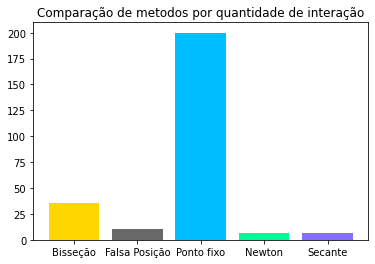

In [58]:
index = np.arange(5)
plt.title("Comparação de metodos por quantidade de interação")
plt.bar([1,2,3,4,5],[DBiss.iterations,DFalsaP['Interações'],DPontoF['Interações'],DNewton.iterations,DSecant.iterations],color = ['#FFD700','#696969','#00BFFF','#00FA9A','#8470FF'])
plt.xticks(index+1, ("Bisseção","Falsa Posição","Ponto fixo","Newton","Secante"))
plt.show()

Comparação de convergencia:

In [59]:
convergencia = [DBiss.converged,DFalsaP['Convergencia'],DPontoF['Convergencia'],DNewton.converged,DSecant.converged]
metodos = ["Bisseção","Falsa Posição","Ponto fixo","Newton","Secante"]
print("----------Convergencia---------- ")
for i in range(len(raizes)):
    print(metodos[i],":",convergencia[i])

----------Convergencia---------- 
Bisseção : True
Falsa Posição : True
Ponto fixo : False
Newton : True
Secante : True


Tempo de calculo:

In [60]:
t1D = %timeit -o DBiss
t2D = %timeit -o DFalsaP
t3D = %timeit -o DPontoF
t4D = %timeit -o DNewton
t5D = %timeit -o DSecant

37.8 ns ± 3.31 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
39 ns ± 1.84 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
43.4 ns ± 6.73 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
44.5 ns ± 5.53 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
44 ns ± 5.14 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [61]:
def calcualePorcent(tempo):
    somaTempo = t1D.best+t2D.best+t3D.best+t4D.best+t5D.best
    media = somaTempo/5
    listaPorcentagens = []
    for x in tempo:
        listaPorcentagens.append(x*100/media-100)
    return listaPorcentagens

In [62]:
porcent = calcualePorcent([t1D.best,t2D.best,t3D.best,t4D.best,t5D.best])
print("----------Porcentagem sobre a media do tempo---------- ")
for i in range(len(porcent)):
    print(metodos[i],":",porcent[i],"%")

----------Porcentagem sobre a media do tempo---------- 
Bisseção : -4.776885097617594 %
Falsa Posição : 3.643998689653742 %
Ponto fixo : -0.6283884800771347 %
Newton : 6.172225049448386 %
Secante : -4.410950161407428 %


<h4>e)

In [63]:
def f5(x):
    return (x-3)**5 * np.log(x) 
def f5i(x): 
    return 5*np.log(x)*(x-3)**4+(((x-3)**4)/x) #derivada
def gf5i(x): 
    return (x-3)**5 * np.log(x) + x #simplificada


In [64]:
EBiss = opt.root_scalar(f5,method = "bisect", bracket = [2,5], xtol = 1e-10)#Bisseção
EBiss

      converged: True
           flag: 'converged'
 function_calls: 37
     iterations: 35
           root: 3.000000000029104

In [65]:
EFalsaP = interpolacao(f5,2,5, 1e-10)#Falsa posição
EFalsaP

{'Convergencia': False, 'Interações': 200, 'Root': 2.5939097642054603}

In [66]:
EPontoF = ponto_fixo(gf5i,2.9,1e-10)#ponto fixo
EPontoF

{'Convergencia': False, 'Interações': 200, 'Root': 2.8977509434951516}

In [67]:
ENewton = opt.root_scalar(f5, fprime=f5i, x0=2.9, method='newton')#newton
ENewton

      converged: False
           flag: 'convergence error'
 function_calls: 100
     iterations: 50
           root: 2.9999970833079606

In [68]:
ESecant = opt.root_scalar(f5, method='secant', x0=2, x1=5)#secante
ESecant

      converged: False
           flag: 'convergence error'
 function_calls: 52
     iterations: 50
           root: 2.9995245717240695

Comparação de raizes:

In [69]:
raizes = [EBiss.root,EFalsaP['Root'],EPontoF['Root'],ENewton.root,ESecant.root]
metodos = ["Bisseção","Falsa Posição","Ponto fixo","Newton","Secante"]
print("----------Raizes---------- ")
for i in range(len(raizes)):
    print(metodos[i],":",raizes[i])

----------Raizes---------- 
Bisseção : 3.000000000029104
Falsa Posição : 2.5939097642054603
Ponto fixo : 2.8977509434951516
Newton : 2.9999970833079606
Secante : 2.9995245717240695


Comparação de interações:

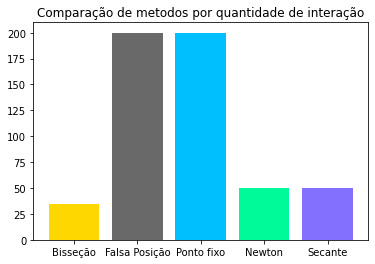

In [70]:
index = np.arange(5)
plt.title("Comparação de metodos por quantidade de interação")
plt.bar([1,2,3,4,5],[EBiss.iterations,EFalsaP['Interações'],EPontoF['Interações'],ENewton.iterations,ESecant.iterations],color = ['#FFD700','#696969','#00BFFF','#00FA9A','#8470FF'])
plt.xticks(index+1, ("Bisseção","Falsa Posição","Ponto fixo","Newton","Secante"))
plt.show()

Comparação de convergencia:

In [71]:
convergencia = [EBiss.converged,EFalsaP['Convergencia'],EPontoF['Convergencia'],ENewton.converged,ESecant.converged]
metodos = ["Bisseção","Falsa Posição","Ponto fixo","Newton","Secante"]
print("----------Convergencia---------- ")
for i in range(len(raizes)):
    print(metodos[i],":",convergencia[i])

----------Convergencia---------- 
Bisseção : True
Falsa Posição : False
Ponto fixo : False
Newton : False
Secante : False


Tempo de calculo:

In [72]:
t1E = %timeit -o EBiss
t2E = %timeit -o EFalsaP
t3E = %timeit -o EPontoF
t4E = %timeit -o ENewton
t5E = %timeit -o ESecant

44 ns ± 12.4 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
40.7 ns ± 4.61 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
36.5 ns ± 1.55 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
36.7 ns ± 1.74 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
36.1 ns ± 5.81 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [73]:
def calcualePorcent(tempo):
    somaTempo = t1E.best+t2E.best+t3E.best+t4E.best+t5E.best
    media = somaTempo/5
    listaPorcentagens = []
    for x in tempo:
        listaPorcentagens.append(x*100/media-100)
    return listaPorcentagens

In [74]:
porcent = calcualePorcent([t1E.best,t2E.best,t3E.best,t4E.best,t5E.best])
print("----------Porcentagem sobre a media do tempo---------- ")
for i in range(len(porcent)):
    print(metodos[i],":",porcent[i],"%")

----------Porcentagem sobre a media do tempo---------- 
Bisseção : -2.6180777489074387 %
Falsa Posição : -2.915060964768415 %
Ponto fixo : 2.1578822490289014 %
Newton : 5.45782832216365 %
Secante : -2.0825718575166547 %


<h4>f)

In [75]:
def f6(x):
    return x**10 - 1

def f6i(x):
    return 10*x**9 #derivada

def gf6i(x):
    return 1/(x)**9 #simplificada


In [76]:
FBiss = opt.root_scalar(f6,method = "bisect", bracket = [0.8,1.2], xtol = 1e-10)#Bisseção
FBiss

      converged: True
           flag: 'converged'
 function_calls: 3
     iterations: 1
           root: 1.0

In [77]:
FFalsaP = interpolacao(f6,0.8,1.2, 1e-10)#Falsa posição
FFalsaP

{'Convergencia': True, 'Interações': 45, 'Root': 0.9999999999002991}

In [78]:
FPontoF = ponto_fixo(gf6i,1,1e-10)#ponto fixo
FPontoF

{'Convergencia': True, 'Interações': 1, 'Root': 1.0}

In [79]:
FNewton = opt.root_scalar(f6, fprime=f6i, x0=0.8, method='newton')#newton
FNewton

      converged: True
           flag: 'converged'
 function_calls: 20
     iterations: 10
           root: 1.0

In [80]:
FSecant = opt.root_scalar(f6, method='secant', x0=0.8, x1=1.2)#secante
FSecant

      converged: True
           flag: 'converged'
 function_calls: 11
     iterations: 10
           root: 0.9999999999999333

Comparação de raizes:

In [81]:
raizes = [FBiss.root,FFalsaP['Root'],FPontoF['Root'],FNewton.root,FSecant.root]
metodos = ["Bisseção","Falsa Posição","Ponto fixo","Newton","Secante"]
print("----------Raizes---------- ")
for i in range(len(raizes)):
    print(metodos[i],":",raizes[i])

----------Raizes---------- 
Bisseção : 1.0
Falsa Posição : 0.9999999999002991
Ponto fixo : 1.0
Newton : 1.0
Secante : 0.9999999999999333


Comparação de interações:

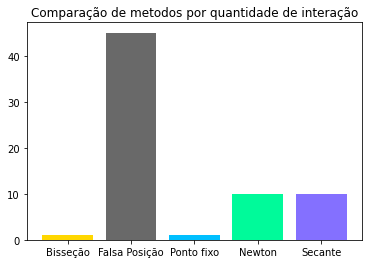

In [82]:
index = np.arange(5)
plt.title("Comparação de metodos por quantidade de interação")
plt.bar([1,2,3,4,5],[FBiss.iterations,FFalsaP['Interações'],FPontoF['Interações'],FNewton.iterations,FSecant.iterations],color = ['#FFD700','#696969','#00BFFF','#00FA9A','#8470FF'])
plt.xticks(index+1, ("Bisseção","Falsa Posição","Ponto fixo","Newton","Secante"))
plt.show()

Comparação de convergencia:

In [83]:
convergencia = [FBiss.converged,FFalsaP['Convergencia'],FPontoF['Convergencia'],FNewton.converged,FSecant.converged]
metodos = ["Bisseção","Falsa Posição","Ponto fixo","Newton","Secante"]
print("----------Convergencia---------- ")
for i in range(len(raizes)):
    print(metodos[i],":",convergencia[i])

----------Convergencia---------- 
Bisseção : True
Falsa Posição : True
Ponto fixo : True
Newton : True
Secante : True


Tempo de calculo:

In [84]:
t1F = %timeit -o FBiss
t2F = %timeit -o FFalsaP
t3F = %timeit -o FPontoF
t4F = %timeit -o FNewton
t5F = %timeit -o FSecant

33.6 ns ± 2.07 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
38.9 ns ± 3.99 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
32.6 ns ± 0.647 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
35.8 ns ± 1.27 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
38.1 ns ± 2.62 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [85]:
def calcualePorcent(tempo):
    somaTempo = t1F.best+t2F.best+t3F.best+t4F.best+t5F.best
    media = somaTempo/5
    listaPorcentagens = []
    for x in tempo:
        listaPorcentagens.append(x*100/media-100)
    return listaPorcentagens

In [86]:
porcent = calcualePorcent([t1F.best,t2F.best,t3F.best,t4F.best,t5F.best])
print("----------Porcentagem sobre a media do tempo---------- ")
for i in range(len(porcent)):
    print(metodos[i],":",porcent[i],"%")

----------Porcentagem sobre a media do tempo---------- 
Bisseção : -7.654455049163019 %
Falsa Posição : 4.837722141986859 %
Ponto fixo : -6.197775479808769 %
Newton : 2.6284457838836204 %
Secante : 6.3860626031012515 %
